# YouTube energy comparison for turning off iowait boost

Test: Run YouTube video for 30 seconds, and collect energy 15 times (total test time 7.5 minutes)
Wifi was turned off and video played back with youtube red

In [25]:
%pylab inline

import pandas as pd
import sqlite3
import matplotlib.cm as cm
import os, json
from collections import namedtuple

# Provide the root path where your test folders are stored
results_dir = '/home/joelaf/repo/lisa/results/wifi-off/'

# Provide the names of the results folders you want compared
all_test_dirs = [
                 "yt_schedutil_energy_1.2_30s_run1",
                 "yt_schedutil_energy_1.2_30s_noiowaitboost_run2",
                 "yt_schedutil_energy_1.2_bigsoff"
                ]

Populating the interactive namespace from numpy and matplotlib


# Plot histograms of energy consumed for tests

       schedutil_energy_1.2_30s_run1
count                      15.000000
mean                        8.042533
std                         0.039394
min                         7.966584
25%                         8.014455
50%                         8.051294
75%                         8.058296
max                         8.110917
       schedutil_energy_1.2_30s_noiowaitboost_run2
count                                    15.000000
mean                                      7.948377
std                                       0.039497
min                                       7.897061
25%                                       7.910292
50%                                       7.957902
75%                                       7.977662
max                                       8.005220
       schedutil_energy_1.2_bigsoff
count                     15.000000
mean                       7.580664
std                        0.037787
min                        7.532140
25%                        7

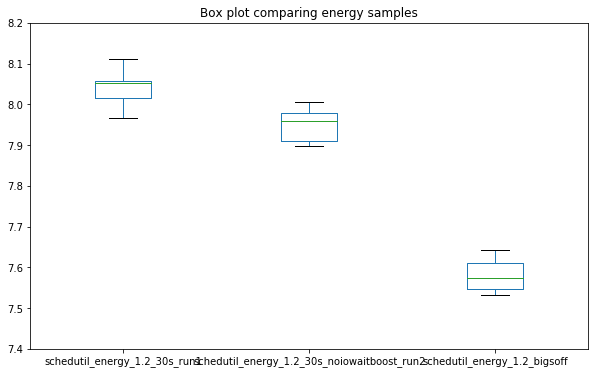

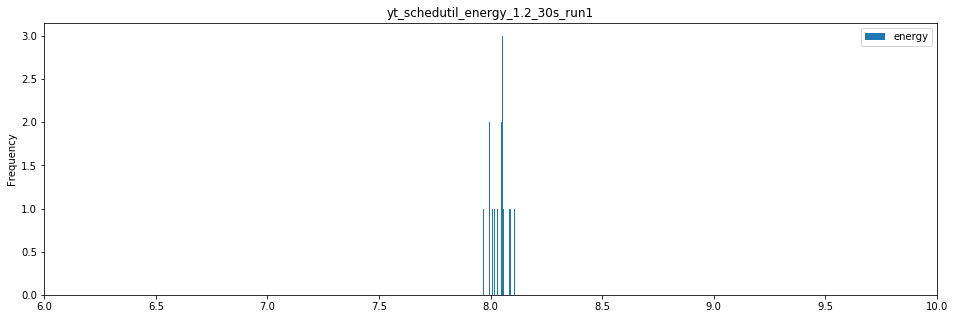

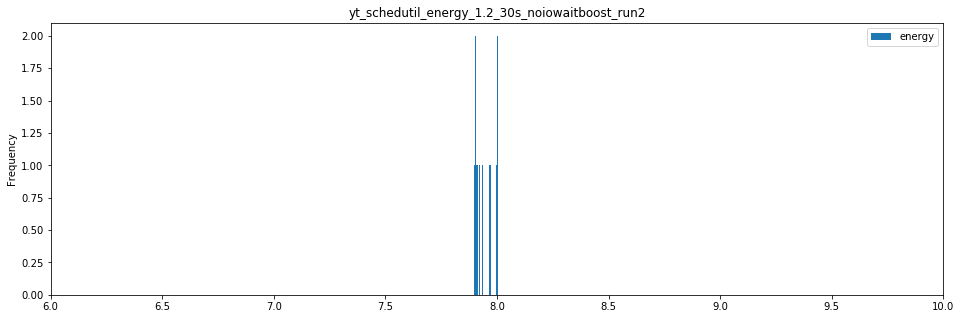

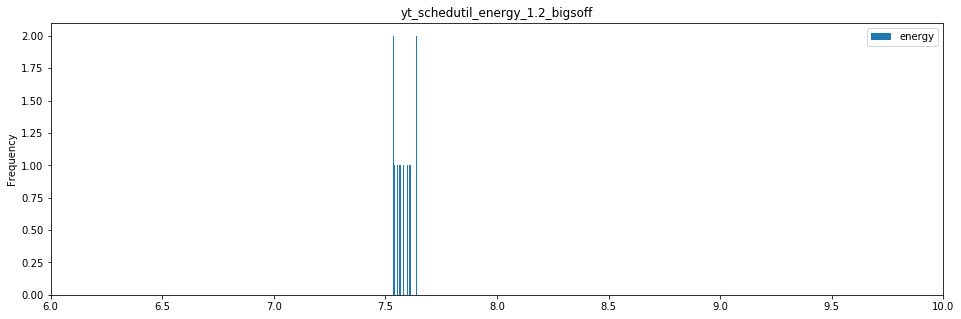

In [30]:
# Plot a box plot
fig, axes = plt.subplots()
df_all = []
for test in all_test_dirs:
    test_dir = results_dir + "/" + test
    with open(test_dir + "/energy_all_runs.json") as f:
        samples = json.load(f)['energy_samples']
    df = pd.DataFrame(samples, columns=[test[3:]])
    print df.describe()
    df_all.append(df)

df_box = pd.concat(df_all, axis=1)
axes = df_box.plot.box(figsize=(10, 6), ax=axes, ylim=(7.4,8.2), title="Box plot comparing energy samples")

# Plot a histogram of energy values collected
def plot_energy(test):
    test_dir = results_dir + "/" + test
    with open(test_dir + "/energy_all_runs.json") as f:
        samples = json.load(f)['energy_samples']
    df = pd.DataFrame(samples, columns=['energy'])
    fig, axes = plt.subplots()
    # print axes
    df.plot(kind='hist', bins=32, xlim=(6,10), title=test, figsize=(16,5), ax=axes)

for t in all_test_dirs:
    plot_energy(t)
